In [2]:
#All imports that will be used should be put here for easibility and organization. 
# If any import needs a command run in the terminal please specify the steps in the readme.txt file in the directory for this project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import metrics
#pip install yfinance
#import yfinance as yf
import plotly.graph_objects as go

In [3]:
# In this step we are taking the data from the CSV containing all datapoints for the twitter stock and constructing a dataframe
df = pd.read_csv("twitter-stocks.csv")
# Print the head of dataframe to make sure data was collected properly : first 5 inputs will be printed
print(df.head())

       Date       Open       High        Low      Close  Adj Close     Volume
0   11/7/13  45.099998  50.090000  44.000000  44.900002  44.900002  117701670
1   11/8/13  45.930000  46.939999  40.685001  41.650002  41.650002   27925307
2  11/11/13  40.500000  43.000000  39.400002  42.900002  42.900002   16113941
3  11/12/13  43.660000  43.779999  41.830002  41.900002  41.900002    6316755
4  11/13/13  41.029999  42.869999  40.759998  42.599998  42.599998    8688325


In [4]:
# In this section we will be creating a dummy variable for whether the twitter stock increased during a specific day
# We will do this by comparing opening and closing prices for each day : 
# if opening > closing --> dummy variable = 1
# if opening < closing --> dummy variable = 0

# we start by creating an empty array that will contain dummy variables based off conditions comparing opening and closing prices for each datapoint in the dataframe
# result[] will be then used to populate the dataframe dummy variable once conditions are tested for each datapoint in the dataframe
result = []

# We start by comparing each opening price and closing price datapoint in the dataframe and creating a new column in the dataframe named --> Daily
df['Daily'] = df['Open'] - df['Close']
# at this point we print the daily column to make sure that data was inserted to the new column properly
# At this point, the new column will contain the difference of opening and closing prices for the twitter stock for each datapoint (day) 
print(df['Daily'])

# We then run a forloop to iterate through each datapoint in the "Daily" column:
for daily in df['Daily']:
    # if this day's difference is negative then we append -1 to the results array to signify a negative closing difference for the day
    if daily < 0:
        result.append(0)
    # if this day's difference is positive then we append 1 to the results array to signify a positive closing difference for the day
    else:
        result.append(1)

# Lastly we set the "Daily" column in the dataframe to equal the new result array containing : 0, 1, -1 to represent positive, negative, or No Change in the stock price for each day
df["Daily"] = result
print(df) 

0       0.199996
1       4.279998
2      -2.400002
3       1.759998
4      -1.569999
          ...   
2254    0.110001
2255   -0.810001
2256   -0.364998
2257   -0.399997
2258    0.209999
Name: Daily, Length: 2259, dtype: float64
          Date       Open       High        Low      Close  Adj Close  \
0      11/7/13  45.099998  50.090000  44.000000  44.900002  44.900002   
1      11/8/13  45.930000  46.939999  40.685001  41.650002  41.650002   
2     11/11/13  40.500000  43.000000  39.400002  42.900002  42.900002   
3     11/12/13  43.660000  43.779999  41.830002  41.900002  41.900002   
4     11/13/13  41.029999  42.869999  40.759998  42.599998  42.599998   
...        ...        ...        ...        ...        ...        ...   
2254  10/21/22  50.000000  50.750000  49.549999  49.889999  49.889999   
2255  10/24/22  50.709999  51.860001  50.520000  51.520000  51.520000   
2256  10/25/22  52.415001  53.180000  52.200001  52.779999  52.779999   
2257  10/26/22  52.950001  53.500000  52.

/var/folders/t6/b8x_7zyn5szgl34zhr_bglm80000gn/T/ipykernel_8255/15683115.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


               Open      High       Low     Close  Adj Close    Volume  \
Open       1.000000  0.998860  0.998588  0.997414   0.997414 -0.015718   
High       0.998860  1.000000  0.998265  0.998731   0.998731 -0.001709   
Low        0.998588  0.998265  1.000000  0.998887   0.998887 -0.031352   
Close      0.997414  0.998731  0.998887  1.000000   1.000000 -0.019179   
Adj Close  0.997414  0.998731  0.998887  1.000000   1.000000 -0.019179   
Volume    -0.015718 -0.001709 -0.031352 -0.019179  -0.019179  1.000000   
Daily      0.022860 -0.001161 -0.001384 -0.024407  -0.024407 -0.009729   

              Daily  
Open       0.022860  
High      -0.001161  
Low       -0.001384  
Close     -0.024407  
Adj Close -0.024407  
Volume    -0.009729  
Daily      1.000000  


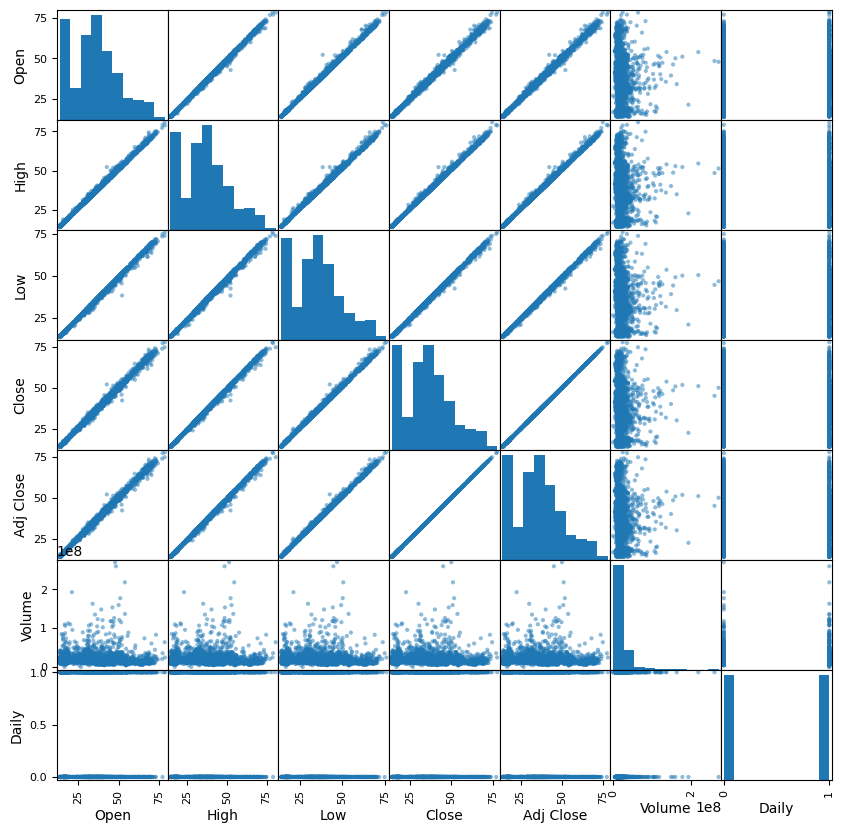

In [5]:
pd.plotting.scatter_matrix(df, figsize =(10,10))
print(df.corr())

In [6]:
predTrain = df[['Open', 'High', 'Low', 'Close', 'Adj Close']] # gets predictors from the dataframe (cols)
resTrain = df['Daily']
predTrain = sm.add_constant(predTrain) # adds a column of 1's to an array
linReg = sm.OLS(resTrain,predTrain).fit() # fits a logistic regression model to the data
print(linReg.summary())
resPred = linReg.predict(predTrain) # tests the model
finPred = list(map(round, resPred)) #makes the values in the appropriate form 
error = 1 - metrics.accuracy_score(resTrain, finPred) # computes the accuracy score and subtracts from 1 to get the error
print("First Attempt Linear Regression: ", error) 

predTrain = df[['Open', 'Low', 'Close', 'Adj Close']] # gets predictors from the dataframe (cols)
predTrain = sm.add_constant(predTrain) # adds a column of 1's to an array
linReg = sm.OLS(resTrain,predTrain).fit() # fits a logistic regression model to the data
print(linReg.summary())
resPred = linReg.predict(predTrain) # tests the model
finPred = list(map(round, resPred)) #makes the values in the appropriate form 
error = 1 - metrics.accuracy_score(resTrain, finPred) # computes the accuracy score and subtracts from 1 to get the error
print("Follow-up Attempt at Linear Regression ", error) 


                            OLS Regression Results                            
Dep. Variable:                  Daily   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     435.9
Date:                Thu, 08 Dec 2022   Prob (F-statistic):          1.79e-278
Time:                        22:19:46   Log-Likelihood:                -992.39
No. Observations:                2259   AIC:                             1995.
Df Residuals:                    2254   BIC:                             2023.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5180      0.022     23.860      0.0

In [8]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from patsy import dmatrix
from pygam import LinearGAM, l, s, f

Wage = df
print(Wage)
# (a)
# CV
lm     = LinearRegression()
cv_mse = np.zeros(10)

for i in range(1,11):
    age_poly    = PolynomialFeatures(i).fit_transform(Wage['age'].values.reshape(-1,1))
    lm_fit      = lm.fit(age_poly, Wage['wage'])
    kf10        = KFold(n_splits=10)
    scores      = cross_val_score(lm_fit, age_poly, Wage['wage'], scoring="neg_mean_squared_error", cv=kf10)
    cv_mse[i-1] = np.mean(np.abs(scores))
    
plt.plot(range(1,11), cv_mse)
plt.scatter(cv_mse.argmin()+1, cv_mse.min(), s=100, c='r')
plt.xlabel('# of polynomial degrees')
plt.ylabel('10-fold CV MSE')
# 4 is chosen by 10-fold CV.

# ANOVA
fit = []
for i in range(1,11):
    age_poly = PolynomialFeatures(i).fit_transform(Wage['age'].values.reshape(-1,1))
    lm_fit   = sm.OLS(Wage['wage'], age_poly).fit()
    fit.append(lm_fit) 
  
print(sm.stats.anova_lm(fit[0], fit[1], fit[2], fit[3], fit[4], fit[5], fit[6], fit[7], fit[8], fit[9], typ=1))
# 4 is chosen by anova.

# plot
age_grid = np.arange(Wage['age'].min(), Wage['age'].max()).reshape(-1,1)
x_test   = PolynomialFeatures(4).fit_transform(age_grid)
y_pred   = fit[3].predict(x_test)
se_pred  = fit[3].get_prediction(x_test).summary_frame()['mean_se']

fig, ax = plt.subplots(1, 1)
fig.suptitle('Degree-4 Polynomial')
ax.scatter(Wage['age'], Wage['wage'], facecolor='None', edgecolor='k', alpha=0.3)
ax.plot(age_grid, y_pred, color='b')
ax.plot(age_grid, y_pred+2*se_pred, color='b', linestyle='dashed')
ax.plot(age_grid, y_pred-2*se_pred, color='b', linestyle='dashed')
ax.set_xlabel('age')
ax.set_ylabel('wage')

# (b)
lm     = LinearRegression()
cv_mse = np.zeros(9)

for i in range(2,11):
    age_cut, bins  = pd.cut(Wage['age'], i, retbins=True, right=True)
    age_cut.value_counts(sort=False)
    age_step       = pd.concat([Wage['age'], age_cut, Wage['wage']], keys=['age', 'age_cut', 'wage'], axis = 1)
    age_step_dummy = pd.get_dummies(age_step['age_cut'])
    age_step_dummy = age_step_dummy.drop(age_step_dummy.columns[0], axis = 1)

    lm_fit      = lm.fit(age_step_dummy, Wage['wage'])
    kf10        = KFold(n_splits=10)
    scores      = cross_val_score(lm_fit, age_step_dummy, Wage['wage'], scoring="neg_mean_squared_error", cv=kf10)
    cv_mse[i-2] = np.mean(np.abs(scores))
    
plt.plot(range(2,11), cv_mse)
plt.scatter(cv_mse.argmin()+2, cv_mse.min(), s=100, c='r')
plt.xlabel('# of age bins')
plt.ylabel('10-fold CV MSE')
# 8 is chosen by 10-fold CV.

# plot
age_cut, bins  = pd.cut(Wage['age'], cv_mse.argmin()+2, retbins=True, right=True)
age_cut.value_counts(sort=False)  
age_step       = pd.concat([Wage['age'], age_cut, Wage['wage']], keys=['age', 'age_cut', 'wage'], axis = 1)
age_step_dummy = pd.get_dummies(age_step['age_cut'])
age_step_dummy = age_step_dummy.drop(age_step_dummy.columns[0], axis = 1)
age_step_dummy = sm.add_constant(age_step_dummy)

# use statsmodels as it reports prediction SE
lm_fit = sm.OLS(age_step.wage, age_step_dummy).fit()
    
age_grid    = np.arange(Wage['age'].min(), Wage['age'].max()).reshape(-1,1)
bin_mapping = np.digitize(age_grid.ravel(), bins)
x_test      = sm.add_constant(pd.get_dummies(bin_mapping).drop(1, axis = 1))
y_pred      = lm_fit.predict(x_test)
se_pred     = lm_fit.get_prediction(x_test).summary_frame()['mean_se']

fig, ax = plt.subplots(1, 1)
fig.suptitle('8-Age-Bin Step Function')
ax.scatter(Wage['age'], Wage['wage'], facecolor='None', edgecolor='k', alpha=0.3)
ax.plot(age_grid, y_pred, color='b')
ax.plot(age_grid, y_pred+2*se_pred, color='b', linestyle='dashed')
ax.plot(age_grid, y_pred-2*se_pred, color='b', linestyle='dashed')
ax.set_xlabel('age')
ax.set_ylabel('wage')

          Date       Open       High        Low      Close  Adj Close  \
0      11/7/13  45.099998  50.090000  44.000000  44.900002  44.900002   
1      11/8/13  45.930000  46.939999  40.685001  41.650002  41.650002   
2     11/11/13  40.500000  43.000000  39.400002  42.900002  42.900002   
3     11/12/13  43.660000  43.779999  41.830002  41.900002  41.900002   
4     11/13/13  41.029999  42.869999  40.759998  42.599998  42.599998   
...        ...        ...        ...        ...        ...        ...   
2254  10/21/22  50.000000  50.750000  49.549999  49.889999  49.889999   
2255  10/24/22  50.709999  51.860001  50.520000  51.520000  51.520000   
2256  10/25/22  52.415001  53.180000  52.200001  52.779999  52.779999   
2257  10/26/22  52.950001  53.500000  52.770000  53.349998  53.349998   
2258  10/27/22  53.910000  54.000000  53.700001  53.700001  53.700001   

         Volume  Daily  
0     117701670      1  
1      27925307      1  
2      16113941      0  
3       6316755      1 

KeyError: 'age'